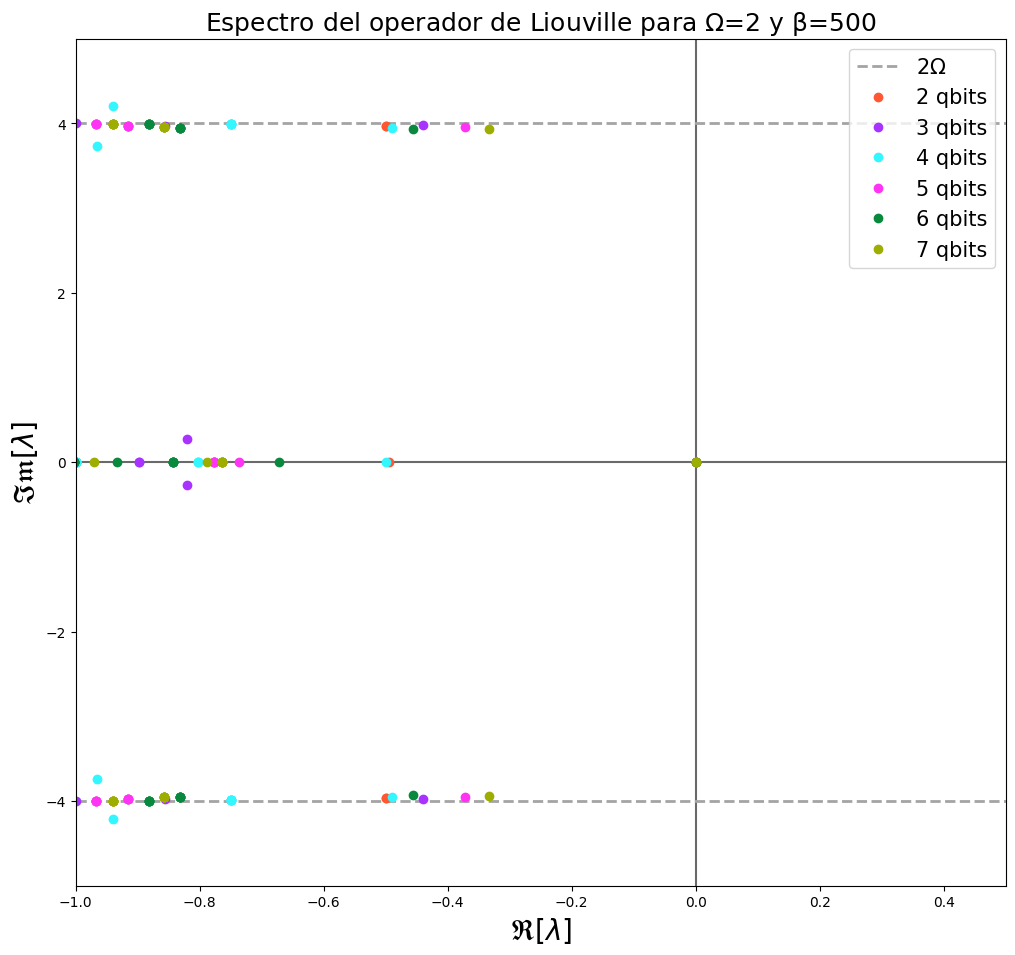

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os

ficheros=list(filter(lambda nombre:nombre[-1]=="t",os.listdir()))




cont=0
Flag=False
for i in range(len(ficheros)):
    for j in range(len(ficheros)-i-1):
        if(int(ficheros[j][0])>int(ficheros[j+1][0])):
            ficheros[j],ficheros[j+1]=ficheros[j+1],ficheros[j]
            

Qbits=7
beta=500

Omega=2


#Represento la figura

plt.figure(1,figsize=(12,11))
plt.subplot(111)
plt.xlim(-1,0.5)
plt.ylim(-2*Omega-Omega/2,2*Omega+Omega/2)
plt.title(r"Espectro del operador de Liouville para $\Omega$="+str(Omega)+" y β="+str(beta),fontsize=18)
plt.xlabel(r"$\mathfrak{R}[\lambda]$",fontsize=20)
plt.ylabel(r"$\mathfrak{Im}[\lambda]$",fontsize=20)
plt.axvline(0.0,color="#6a6a6a")
plt.axhline(0.0,color="#6a6a6a")
plt.axhline(2*Omega,color="#a4a4a4",linestyle="--",linewidth=2.0,label=r"2$\Omega$")
plt.axhline(-2*Omega,color="#a4a4a4",linestyle="--",linewidth=2.0)

colores=["#ff5733","#a833ff","#33f6ff","#ff33f3","#09893d","#9eae00","#8a7f2c","#8a2c2c","#502eac","#2eaca4","#aca82e","#2e5aac"]

for i in range(len(ficheros)):
    datos=np.genfromtxt(ficheros[i],dtype=np.complex256)

    #Divido en parte real e imaginaria
    Rdatos=np.real(datos)
    Idatos=np.imag(datos)

    plt.plot(Rdatos,Idatos,linewidth=0.0,marker="o",markersize=6.0,color=colores[i],label=ficheros[i][0]+" qbits")

plt.legend(loc="upper right",fontsize=15)

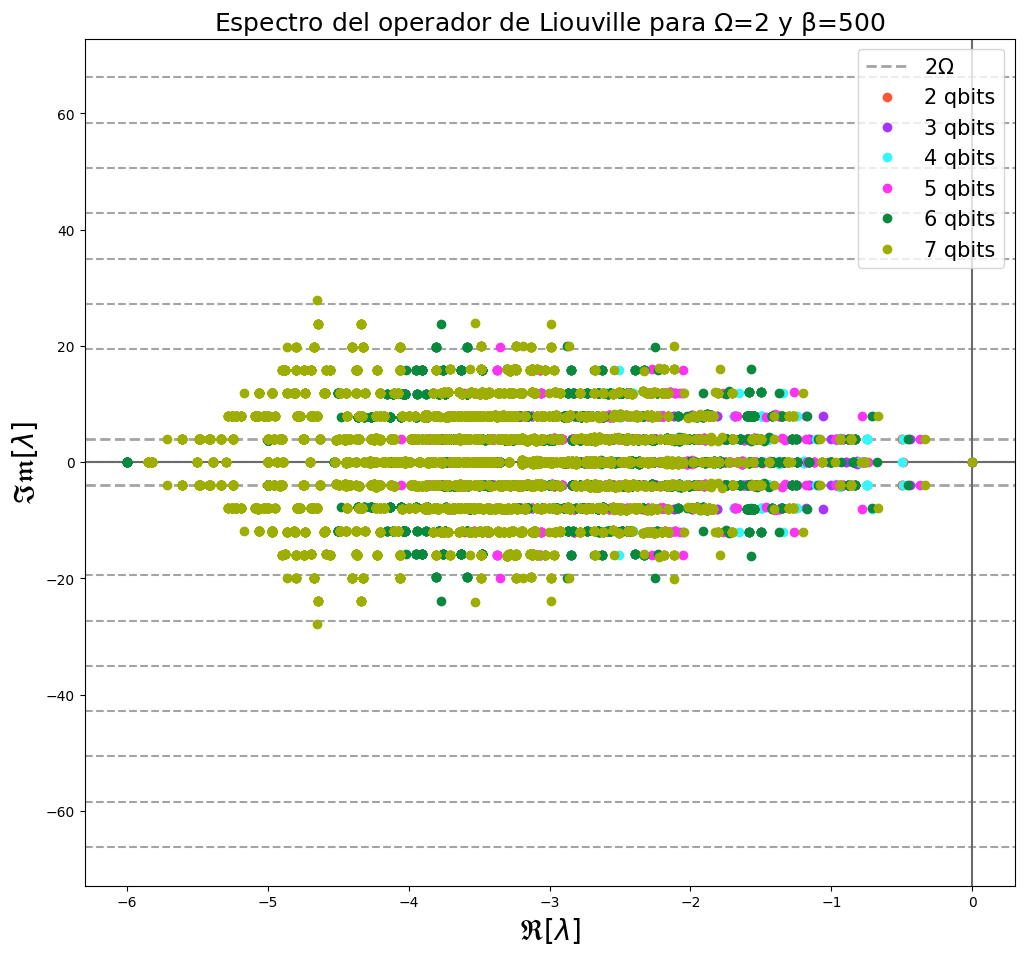

In [6]:
a=np.genfromtxt("TF.csv")
b=np.genfromtxt("Freq.csv")

aux=[]
ls=[]


for i in range(a.size):
    if(a[i]>40):
        aux.append(b[i])

    elif(len(aux)>=1):
        ls.append(aux.copy())
        aux=[]

medias=[]

for i in ls:
    medias.append(np.mean(np.array(i)))


plt.figure(2,figsize=(12,11))
plt.subplot(111)
plt.title(r"Espectro del operador de Liouville para $\Omega$="+str(Omega)+" y β="+str(beta),fontsize=18)
plt.xlabel(r"$\mathfrak{R}[\lambda]$",fontsize=20)
plt.ylabel(r"$\mathfrak{Im}[\lambda]$",fontsize=20)

plt.axhline(2*Omega,color="#a4a4a4",linestyle="--",linewidth=2.0,label=r"2$\Omega$")
plt.axhline(-2*Omega,color="#a4a4a4",linestyle="--",linewidth=2.0)


for i in medias:
    plt.axhline(i,color="#a4a4a4",linestyle="--")
plt.axvline(0.0,color="#6a6a6a")
plt.axhline(0.0,color="#6a6a6a")
colores=["#ff5733","#a833ff","#33f6ff","#ff33f3","#09893d","#9eae00","#8a7f2c","#8a2c2c","#502eac","#2eaca4","#aca82e","#2e5aac"]

for i in range(len(ficheros)):
    datos=np.genfromtxt(ficheros[i],dtype=np.complex256)

    #Divido en parte real e imaginaria
    Rdatos=np.real(datos)
    Idatos=np.imag(datos)

    plt.plot(Rdatos,Idatos,linewidth=0.0,marker="o",markersize=6.0,color=colores[i],label=ficheros[i][0]+" qbits")

plt.legend(loc="upper right",fontsize=15)

[0.5        0.43937222 0.48906879 0.37266095 0.455578   0.33323819]


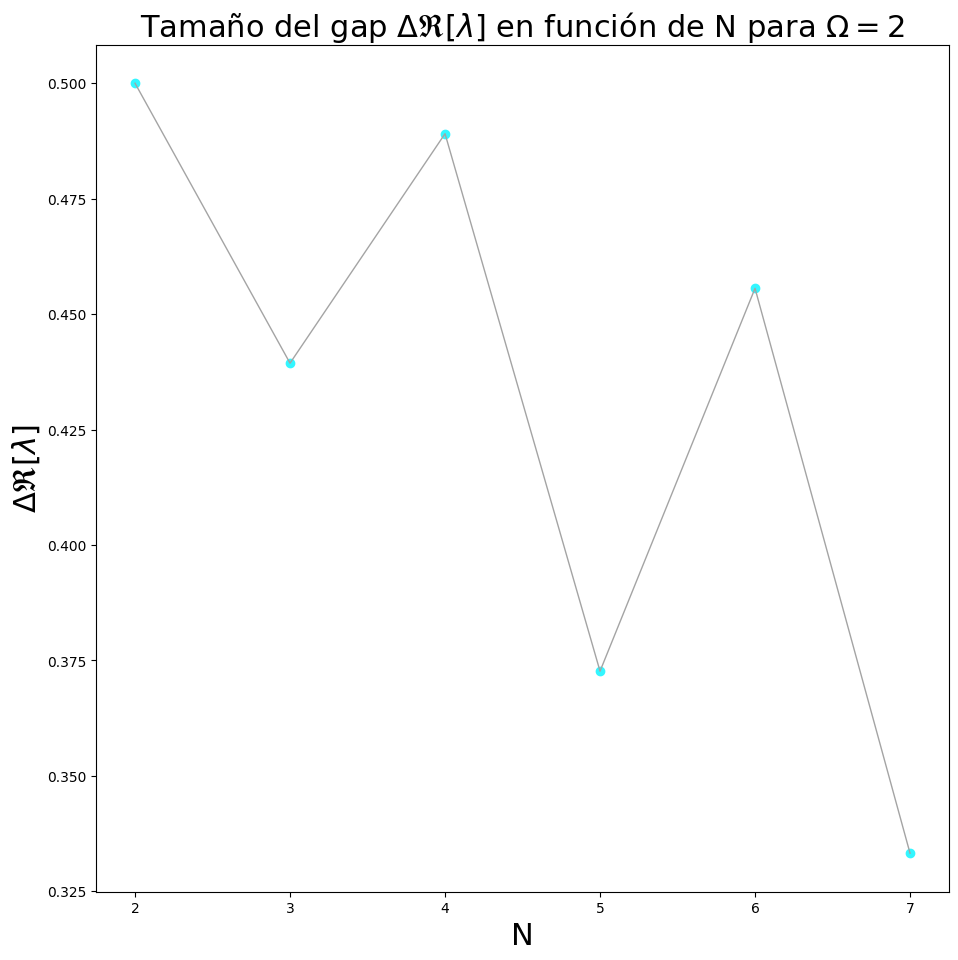

In [7]:
#Saco ahora los autovalores mas cercanos a 0
autovalores=[]
aux=[]
cont=0
for j in range(len(ficheros)):
    datos=np.genfromtxt(ficheros[j],dtype=np.complex256)
    aux=[]
    datos=np.sort(datos,kind="mergesort")

    cont=0
    
    for i in range(1,9):
        
        if(len(aux)<3):
            if(cont==0):
                aux.append(datos[-i])
            elif(cont>=1 and np.abs(np.imag(datos[-i]))>Omega):
                aux.append(datos[-i])
            cont+=1
    
    autovalores.append(aux.copy())

#Calculo los gaps entre los puntos
gaps=np.zeros(len(ficheros))

for i in range(len(ficheros)):
    gaps[i]=np.abs(np.real(autovalores[i][0])-np.real(autovalores[i][1]))

plt.figure(1,figsize=(11,11))

plt.xlabel(r"N",fontsize=22)
plt.ylabel(r"$\Delta \mathfrak{R}[\lambda]$",fontsize=22)

indices=[]
for i in range(gaps.size):
    indices.append(i+2)

plt.title(r"Tamaño del gap $\Delta\mathfrak{R}[\lambda]$ en función de N para $\Omega=$"+str(Omega),fontsize=22)

plt.plot(indices,gaps,linewidth=0.0,marker="o",markersize=6.0,color="#33f6ff")
plt.plot(indices,gaps,linewidth=1.0,color="#a4a4a4")

print(gaps)